In [ ]:
# @title Importação de arquivos externos
# Importa as bibliotecas I/O e Pandas
import io
import pandas as pd
# Importa o arquivo animais_abatidos_categoria_uf.csv
# para o dataframe df
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('animais_abatidos_categoria_uf.csv', encoding='latin-1', sep=';')

Saving animais_abatidos_categoria_uf.csv to animais_abatidos_categoria_uf.csv


In [ ]:
df.shape

(2487073, 6)

# **Plataforma de Gestão Agropecuária - PGA**

# **Ministério da Agricultura**

# **Informações referentes à quantidade de animais abatidos por categoria nas Unidades Federativas**

# **Visualização das colunas e das 10 (dez) linhas iniciais e finais do Dataset**

In [ ]:
display(df.head(10))

,ANO,MES,UF_PROCEDENCIA,MUNICIPIO_PROCEDENCIA,CATEGORIA,QUANTIDADE
0,2022,1,AC,Brasileia,Bovino,3335
1,2022,1,AC,Epitaciolandia,Bovino,1962
2,2021,2,GO,Mossamedes,Bovino,136
3,2021,4,GO,AraÃ§u,Bovino,326
4,2021,4,GO,ItauÃ§u,Bovino,246
5,2021,4,GO,Itaberai,Bovino,1631
6,2021,4,GO,Sao Luis de Montes Belos,Bovino,1250
7,2021,5,GO,Sem correspondÃªncia na PGA GTA,Bovino,19983
8,2021,7,GO,Goianesia,Bovino,4812
9,2021,8,GO,Ipameri,Bovino,2020


In [ ]:
display(df.tail(10))

,ANO,MES,UF_PROCEDENCIA,MUNICIPIO_PROCEDENCIA,CATEGORIA,QUANTIDADE
2487063,2020,4,SC,JaborÃ¡,Frango,621370
2487064,2020,4,GO,Jussara,Novilho Precoce,324
2487065,2020,4,GO,Montes Claros De GoiÃ¡s,Novilha Precoce,14
2487066,2020,4,GO,Abadia De GoiÃ¡s,Novilho Precoce,2
2487067,2020,4,GO,Americano Do Brasil,Novilho Intermediario,4
2487068,2020,4,GO,GuaraÃ­ta,Vaca,5
2487069,2020,4,SC,Xavantina,Novilho Precoce,22
2487070,2020,4,SC,Passos Maia,"Suino Tipo Carne, Femea",1315
2487071,2020,4,PR,Nova Santa Rosa,Frango,781865
2487072,2020,4,MT,Tapurah,"Suino Tipo Carne, Macho",15108


# **Quantidade de animais abatidos de acordo com os dados informados pelo Dataset**

In [ ]:
total_abates = df["QUANTIDADE"].sum()
print(f"Total de animais abatidos: {total_abates:,}")


Total de animais abatidos: 112,327,293,131


/tmp/ipython-input-6-3546772480.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=abates_por_ano.index, y=abates_por_ano.values, palette="Blues_d")


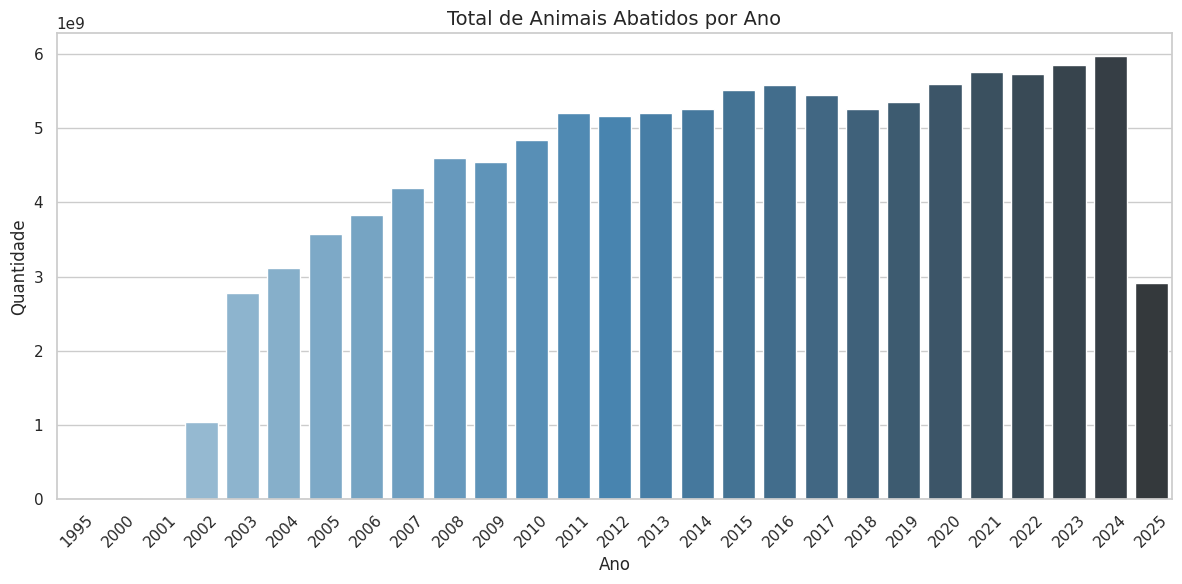

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculando o total de Abates por Ano
abates_por_ano = df.groupby("ANO")["QUANTIDADE"].sum()


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=abates_por_ano.index, y=abates_por_ano.values, palette="Blues_d")
plt.title("Total de Animais Abatidos por Ano", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Pré Processamento**

In [ ]:
import pandas as pd
import unicodedata
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from prophet import Prophet

# Carregamento dos dados
df = pd.read_csv("animais_abatidos_categoria_uf.csv", encoding="latin1", sep=";")

# Limpeza e transformação
df["DATA"] = pd.to_datetime(df["ANO"].astype(str) + "-" + df["MES"].astype(str) + "-01")
df["MUNICIPIO_PROCEDENCIA"] = df["MUNICIPIO_PROCEDENCIA"].apply(
    lambda x: unicodedata.normalize("NFKD", x).encode("ASCII", "ignore").decode("utf-8")
)

# Agregação por data, UF e categoria
df_agg = df.groupby(["DATA", "UF_PROCEDENCIA", "CATEGORIA"])["QUANTIDADE"].sum().reset_index()



# **Random Forest (sem normalização)**

# **1. Preparação dos Dados**

# **2. Codificação de Variáveis Categóricas**

# **3. Separação entre Features e Target**

# **4. Divisão Treino-Teste**

# **5. Modelagem com Random Forest**

# **6. Predição e Avaliação**




In [ ]:
df_ml = df_agg.copy()
df_ml["ANO"] = df_ml["DATA"].dt.year
df_ml["MES"] = df_ml["DATA"].dt.month

df_ml = pd.get_dummies(df_ml, columns=["UF_PROCEDENCIA", "CATEGORIA"], drop_first=True)

X = df_ml.drop(columns=["QUANTIDADE", "DATA"])
y = df_ml["QUANTIDADE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest
MAE: 808256.5167188244
RMSE: 4276060.621456612
R²: 0.9031941685186263


Avalia o modelo usando três métricas:

MAE (Mean Absolute Error): Erro médio absoluto

RMSE (Root Mean Squared Error): Raiz do erro quadrático médio

R² (Coeficiente de Determinação): Mede o quanto a variância é explicada pelo modelo

Objetivo Final:
Prever valores da coluna "QUANTIDADE" usando características como localização (UF), categoria, ano e mês, avaliando a qualidade dessas previsões através de métricas consolidadas.

# **3. Regressão Linear (com normalização)**

# **1. Normalização dos Dados**

# **2. Divisão Treino-Teste**

# **3. Modelagem**

# **4. Avaliação**





/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


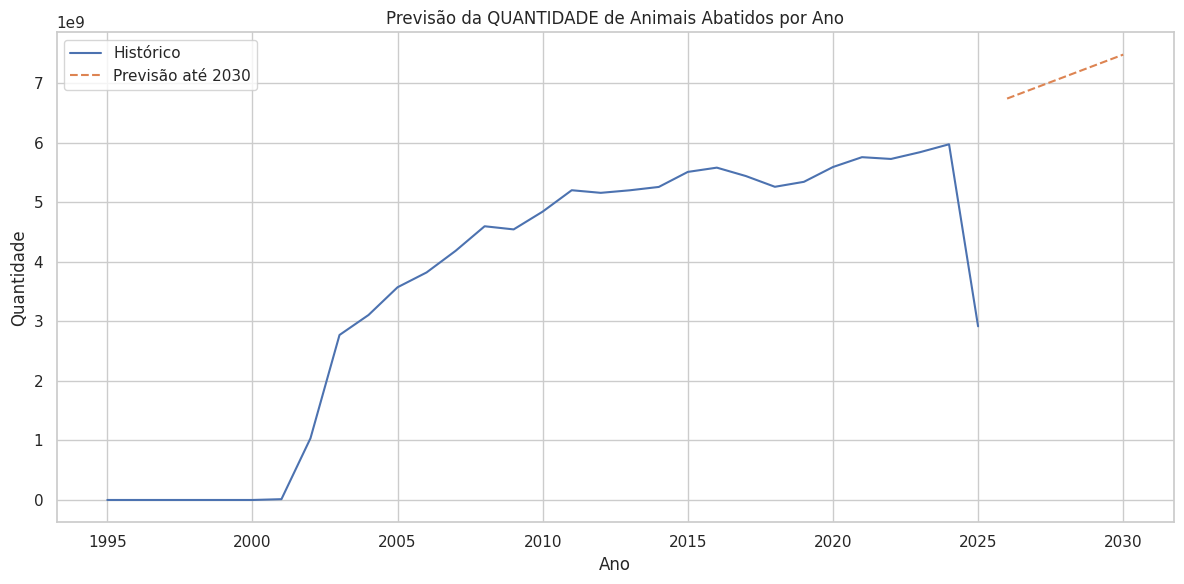

Avaliação nos dados históricos:
MAE: 886939538.1442591
RMSE: 1175199292.4764233
R²: 0.5997671270477458


In [ ]:
# Previsão de QUANTIDADE anual até 2030 usando regressão linear

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Carregar o arquivo CSV (ajuste o caminho conforme o local do seu arquivo)
df = pd.read_csv("animais_abatidos_categoria_uf.csv", sep=";", encoding="utf-8", engine="python")

# 2. Agrupar por ano e somar as quantidades
df_ano = df.groupby('ANO')['QUANTIDADE'].sum().reset_index()

# 3. Criar índice temporal artificial para regressão
# Ex: 0 para o primeiro ano, 1 para o segundo...
df_ano['TimeIndex'] = np.arange(len(df_ano))
X = df_ano[['TimeIndex']]
y = df_ano['QUANTIDADE']

# 4. Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Treinamento da regressão linear
model = LinearRegression()
model.fit(X_scaled, y)

# 6. Projeção de anos futuros até 2030
ano_max = df_ano['ANO'].max()
anos_futuros = np.arange(ano_max + 1, 2031)
time_index_futuro = np.arange(len(df_ano), len(df_ano) + len(anos_futuros)).reshape(-1, 1)
time_index_futuro_scaled = scaler.transform(time_index_futuro)
y_pred_futuro = model.predict(time_index_futuro_scaled)

# 7. Montar DataFrame com previsões futuras
df_proj = pd.DataFrame({
    'ANO': anos_futuros,
    'QUANTIDADE_PREDITA': y_pred_futuro.astype(int)
})

# 8. Visualização: histórico + previsão
plt.figure(figsize=(12,6))
plt.plot(df_ano['ANO'], df_ano['QUANTIDADE'], label='Histórico')
plt.plot(df_proj['ANO'], df_proj['QUANTIDADE_PREDITA'], '--', label='Previsão até 2030')
plt.title('Previsão da QUANTIDADE de Animais Abatidos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Avaliação do modelo com dados históricos
y_pred_hist = model.predict(X_scaled)
print("Avaliação nos dados históricos:")
print("MAE:", mean_absolute_error(y, y_pred_hist))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_hist)))
print("R²:", r2_score(y, y_pred_hist))

# **4. Prophet (série temporal)**


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm_bol_8z/7_ucdhjh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm_bol_8z/llf_9vab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63475', 'data', 'file=/tmp/tmpm_bol_8z/7_ucdhjh.json', 'init=/tmp/tmpm_bol_8z/llf_9vab.json', 'output', 'file=/tmp/tmpm_bol_8z/prophet_model0cht3uml/prophet_model-20250703231641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:16:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:16:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


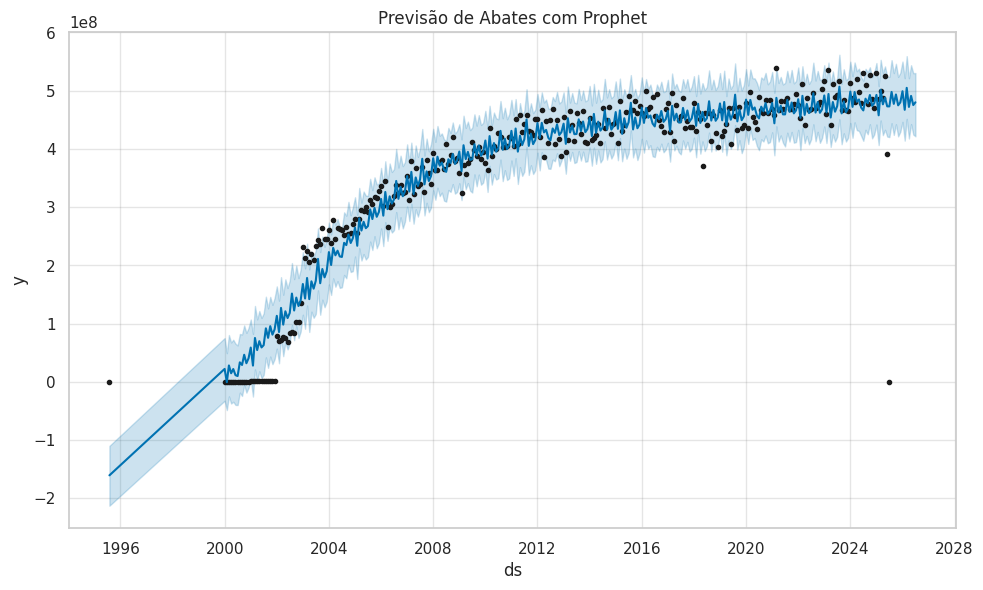

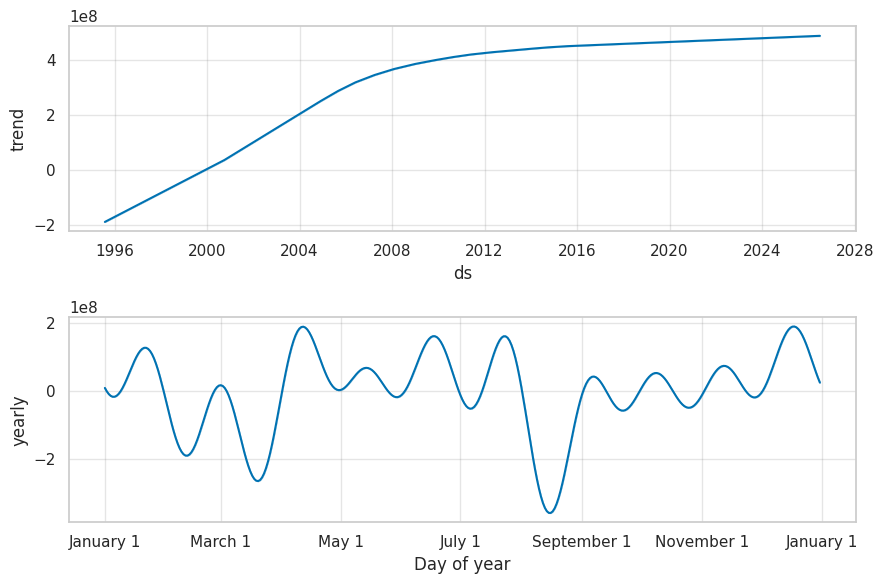

In [ ]:
df_prophet = df_agg.groupby("DATA")["QUANTIDADE"].sum().reset_index()
df_prophet.columns = ["ds", "y"]

modelo_prophet = Prophet()
modelo_prophet.fit(df_prophet)

futuro = modelo_prophet.make_future_dataframe(periods=12, freq="MS")
forecast = modelo_prophet.predict(futuro)

modelo_prophet.plot(forecast)
plt.title("Previsão de Abates com Prophet")
plt.show()

modelo_prophet.plot_components(forecast)
plt.show()


# **Clustering dos Estados (UFs)**

# **1. Filtrar os dados dos últimos 5 anos**

In [ ]:
df_filtrado = df[df["ANO"] >= df["ANO"].max() - 4].copy()


# **2. Agregação para cada UF**

In [ ]:
df_cluster = df_filtrado.groupby(["UF_PROCEDENCIA", "CATEGORIA"])["QUANTIDADE"].sum().unstack(fill_value=0)


# **3. Normalizar os dados**


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)


# **4. Aplicar K-Means (exemplo com 3 clusters)**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["CLUSTER"] = kmeans.fit_predict(df_scaled)


# **5. Visualizar com PCA**

# **O que é PCA?**
# **PCA, ou Análise de Componentes Principais, é uma técnica de aprendizado de máquina usada para reduzir a dimensionalidade de dados, transformando um conjunto de variáveis correlacionadas em um novo conjunto de variáveis não correlacionadas chamadas componentes principais.**


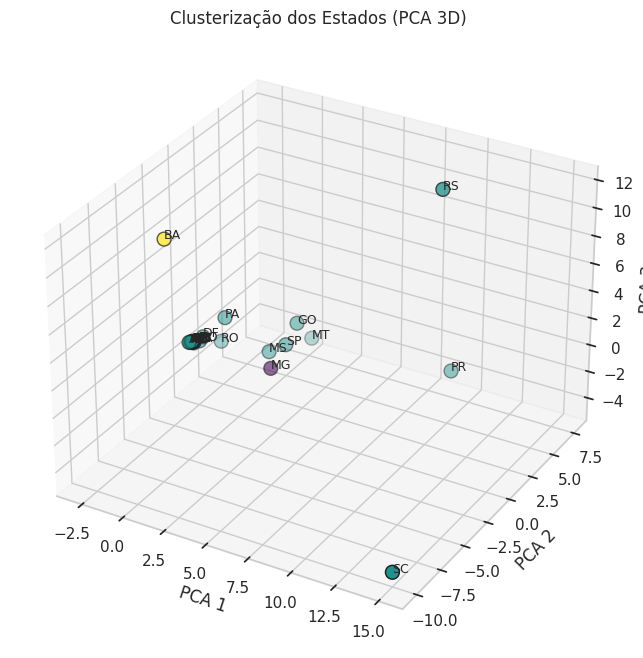

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# PCA para reduzir o gráfico para 3 dimensões
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

# Adicionando ao DataFrame
df_cluster["PCA1"] = pca_result[:, 0]
df_cluster["PCA2"] = pca_result[:, 1]
df_cluster["PCA3"] = pca_result[:, 2]

# Plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    df_cluster["PCA1"],
    df_cluster["PCA2"],
    df_cluster["PCA3"],
    c=df_cluster["CLUSTER"],
    cmap="viridis",
    s=100,
    edgecolors='k'
)

# Nome do Estado/UF ao lado dos pontos
for i, uf in enumerate(df_cluster.index):
    ax.text(df_cluster["PCA1"].iloc[i], df_cluster["PCA2"].iloc[i], df_cluster["PCA3"].iloc[i], uf, fontsize=9)

ax.set_title("Clusterização dos Estados (PCA 3D)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

plt.show()


# **Executando o clustering de Estados brasileiros com base nos padrões de abate nos últimos 5(cinco) anos, somando todas as categorias de animais.**

# **Clustering Simplificado por Volume Total**

# **Objetivo: agrupar os Estados brasileiros de acordo com a quantidade total de abates (independente da categoria) nos últimos 5 anos.**



# **1. Filtrando os últimos 5 (cinco) anos**



In [ ]:
df_recente = df[df["ANO"] >= df["ANO"].max() - 4].copy()


# **2. Somar todos os abates por UF**

In [ ]:
df_cluster = df_recente.groupby("UF_PROCEDENCIA")["QUANTIDADE"].sum().reset_index()
df_cluster.columns = ["UF", "TOTAL_ABATES"]


# **3. Padronizar os dados**


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_cluster[["TOTAL_ABATES"]])


# **4. Aplicando K-Means**



In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster["CLUSTER"] = kmeans.fit_predict(X)


# ***5. Plotando os Clusters ***



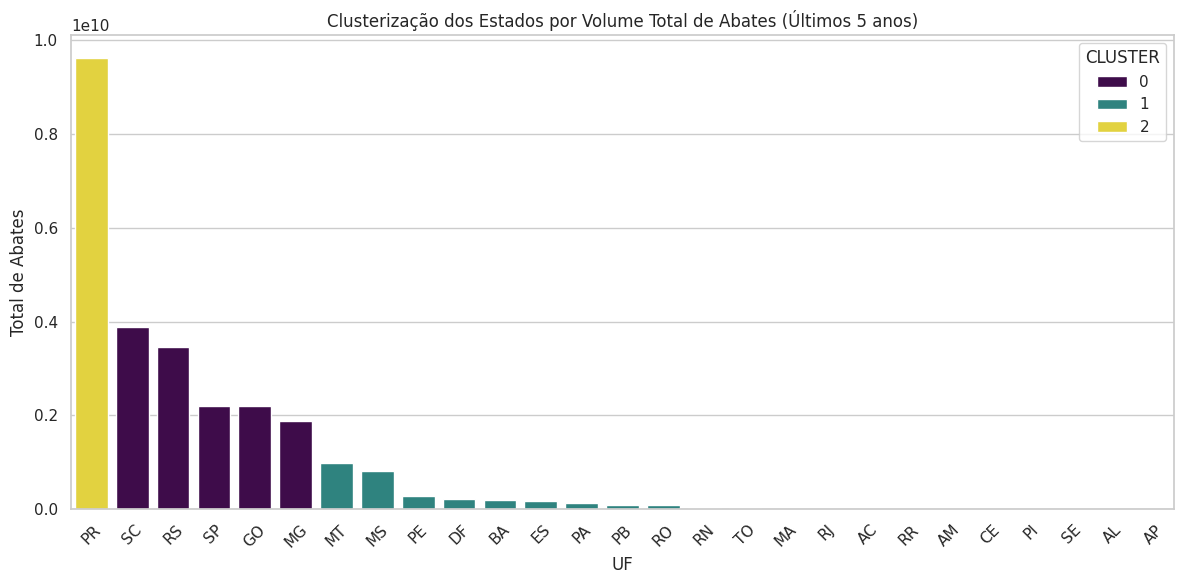

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df_cluster.sort_values("TOTAL_ABATES", ascending=False), x="UF", y="TOTAL_ABATES", hue="CLUSTER", palette="viridis")
plt.title("Clusterização dos Estados por Volume Total de Abates (Últimos 5 anos)")
plt.ylabel("Total de Abates")
plt.xlabel("UF")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Detecção de Tendência de Abates ao longo do tempo**

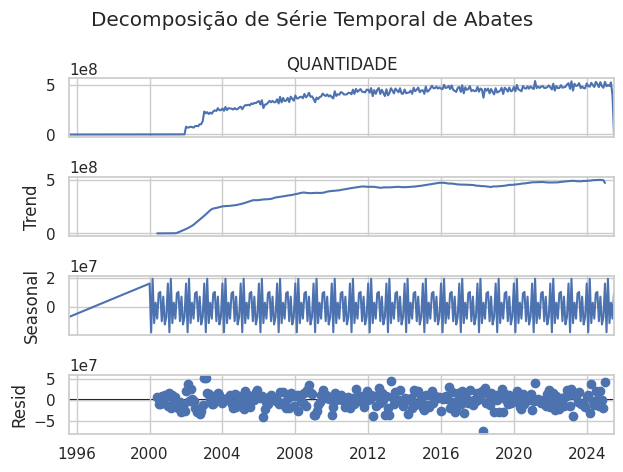

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Série agregada mensal
serie_mensal = df.groupby("DATA")["QUANTIDADE"].sum().sort_index()

# Decomposição aditiva
resultado = seasonal_decompose(serie_mensal, model='additive', period=12)

# Plot da decomposição
resultado.plot()
plt.suptitle("Decomposição de Série Temporal de Abates")
plt.tight_layout()
plt.show()


# **2. Rolling Mean (média móvel)**

# **Visualiza a tendência suavizada ao longo do tempo, ou seja, remove ou reduz flutuações e ruídos em uma série temporal para revelar a tendência geral**

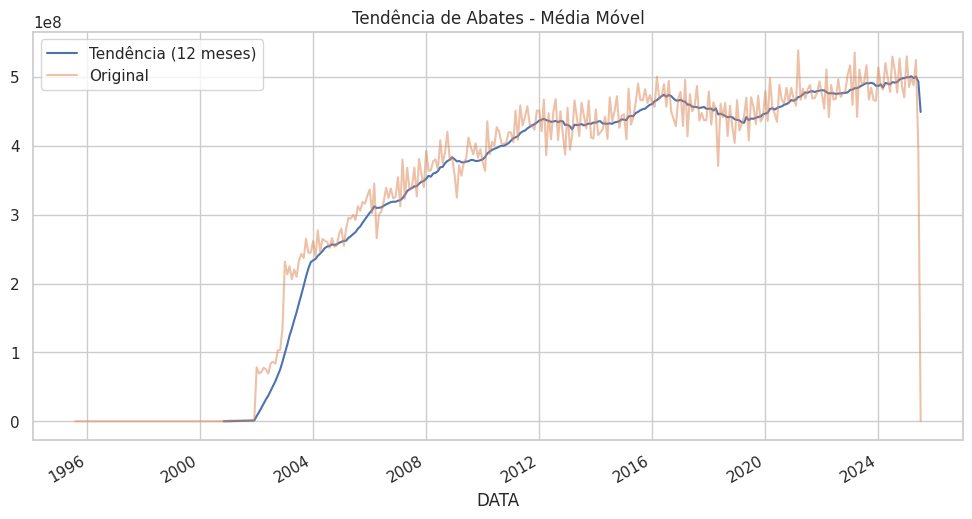

In [ ]:
serie_mensal.rolling(window=12).mean().plot(figsize=(12, 6), label="Tendência (12 meses)")
serie_mensal.plot(alpha=0.5, label="Original")
plt.title("Tendência de Abates - Média Móvel")
plt.legend()
plt.show()


# **3. Regressão Linear no Tempo**

# **Quantifica a tendência como uma reta crescente ou decrescente**



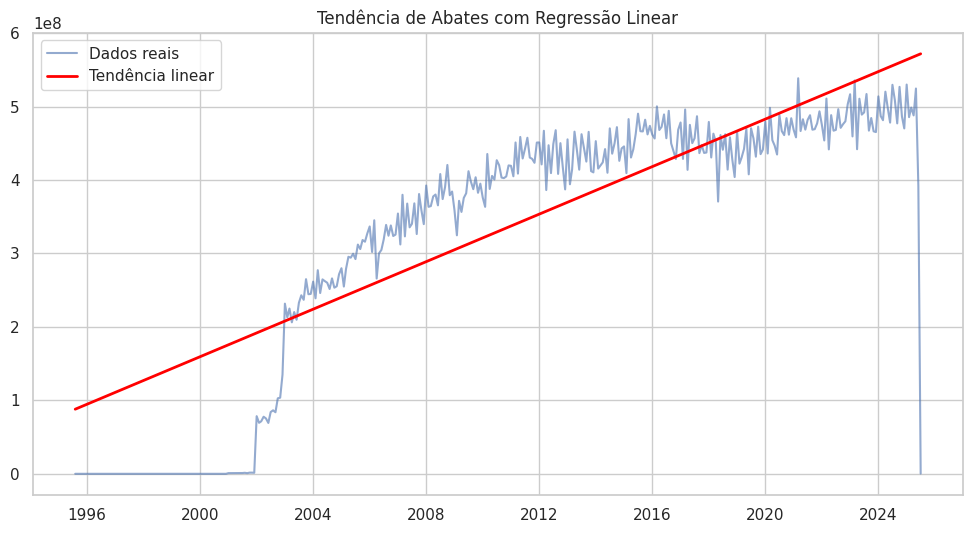

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Converter datas em números
serie = serie_mensal.reset_index()
serie["DATA_NUM"] = (serie["DATA"] - serie["DATA"].min()).dt.days
X = serie[["DATA_NUM"]]
y = serie["QUANTIDADE"]

modelo = LinearRegression()
modelo.fit(X, y)
serie["TREND"] = modelo.predict(X)

# Plotar tendência
plt.figure(figsize=(12, 6))
plt.plot(serie["DATA"], serie["QUANTIDADE"], label="Dados reais", alpha=0.6)
plt.plot(serie["DATA"], serie["TREND"], label="Tendência linear", color="red", linewidth=2)
plt.title("Tendência de Abates com Regressão Linear")
plt.legend()
plt.grid(True)
plt.show()


# **4. Prophet (Modelo de Tendência + Sazonalidade)**

# **O Prophet estima automaticamente a tendência**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm_bol_8z/ktx5h00u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm_bol_8z/3sv9fq3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50292', 'data', 'file=/tmp/tmpm_bol_8z/ktx5h00u.json', 'init=/tmp/tmpm_bol_8z/3sv9fq3f.json', 'output', 'file=/tmp/tmpm_bol_8z/prophet_modelpar6tfe7/prophet_model-20250703234254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:42:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:42:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


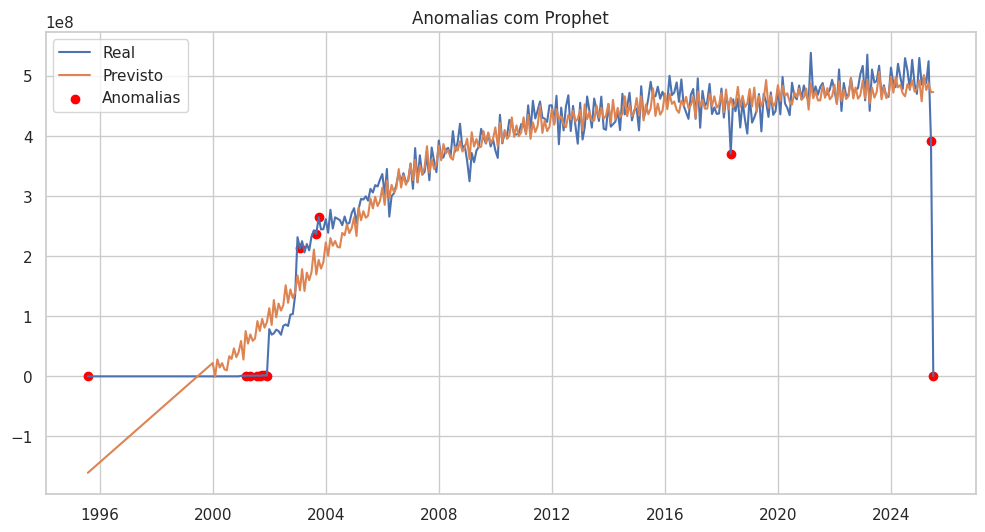

In [ ]:
from prophet import Prophet

df_prophet = serie.reset_index()
df_prophet.columns = ["ds", "y"]

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=0)  # apenas histórico
forecast = model.predict(future)

# Erro absoluto
df_prophet["previsto"] = forecast["yhat"]
df_prophet["erro"] = abs(df_prophet["y"] - df_prophet["previsto"])

# Limite superior (2 desvios)
limite = 2 * df_prophet["erro"].std()
outliers = df_prophet[df_prophet["erro"] > limite]

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_prophet["ds"], df_prophet["y"], label="Real")
plt.plot(df_prophet["ds"], df_prophet["previsto"], label="Previsto")
plt.scatter(outliers["ds"], outliers["y"], color="red", label="Anomalias")
plt.title("Anomalias com Prophet")
plt.legend()
plt.grid(True)
plt.show()


# **DB Score (Davies-Bouldin Index)**
# **É uma métrica de avaliação interna de clusterização.**

# **Quanto menor, melhor (idealmente próximo de 0)**

# ***Mede a semelhança dentro dos clusters (coesão) e a separação entre eles (distância entre centróides) ***

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Agregação por UF nos últimos 5 anos
df_recente = df[df["ANO"] >= df["ANO"].max() - 4]
df_cluster = df_recente.groupby(["UF_PROCEDENCIA", "CATEGORIA"])["QUANTIDADE"].sum().unstack(fill_value=0)

# Escalonamento
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

# Aplicando clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Avaliação com DB Score
for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    score = davies_bouldin_score(X, labels)
    print(f"k={k} ➜ DB Score: {score:.3f}")


k=2 ➜ DB Score: 0.663
k=3 ➜ DB Score: 0.576
k=4 ➜ DB Score: 0.472
k=5 ➜ DB Score: 0.405
k=6 ➜ DB Score: 0.394
k=7 ➜ DB Score: 0.331
k=8 ➜ DB Score: 0.285
k=9 ➜ DB Score: 0.254


# **LSTM Multivariada com Agrupamento por UF + Categoria**

# **Técnica usada:**

# **Redes Neurais Recorrentes (LSTM)**

# **Séries temporais multivariadas**

# **Suporta entradas temporais + categorias embutidas (via embeddings ou one-hot)**

# **Por que LSTM?**

# **Modela dependências de longo prazo**

# **Captura sazonalidade + tendência de forma não linear**

# **GRU(Gated Recurrent Units) é uma versão simplificada da LSTM, que possui dois "portões" (gates) principais:**

# **Portão de Atualização (Update Gate): Decide o quanto da informação anterior será mantida e quanta informação nova será adicionada ao estado oculto.**

# **Portão de Reset (Reset Gate): Decide o quanto da informação anterior será "esquecida" ao computar a nova entrada.**

# **Comparativo entre LSTM Multivariada e GRU**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Treinando Modelo LSTM ---
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
RMSE do Modelo LSTM: 68708616.77

--- Treinando Modelo GRU ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
RMSE do Modelo GRU: 69554273.14

--- Previsões Futuras (LSTM) ---
        DATA  QUANTIDADE_PREVISTA_LSTM
0 2025-08-01               413990208.0
1 2025-09-01               388791936.0
2 2025-10-01               373952160.0
3 2025-11-01               365245952.0
4 2025-12-01               360136832.0
...
         DATA  QUANTIDADE_PREVISTA_LSTM
60 2030-08-01               380251680.0
61 2030-09-01               380339872.0
62 2030-10-01               380424064.0
63 2030-11-01               380504736.0
64 2030-12-01               380581760.0

--- Previsões Futuras (GRU) ---
        DATA  QUANTIDADE_PREVISTA_GRU
0 2025-08-01              416124608.0
1 2025-09-01              250700480.0
2 2025-10-01              281997056.0
3 2025-11-01              284831072.0
4 2025-12-01              286448288.0
...
         DATA  QUANTIDADE_PREVISTA_GRU
60 2030-08-01              284055296.0
61 2030-09-01              284027616.0
62 2030-10-01              28400086

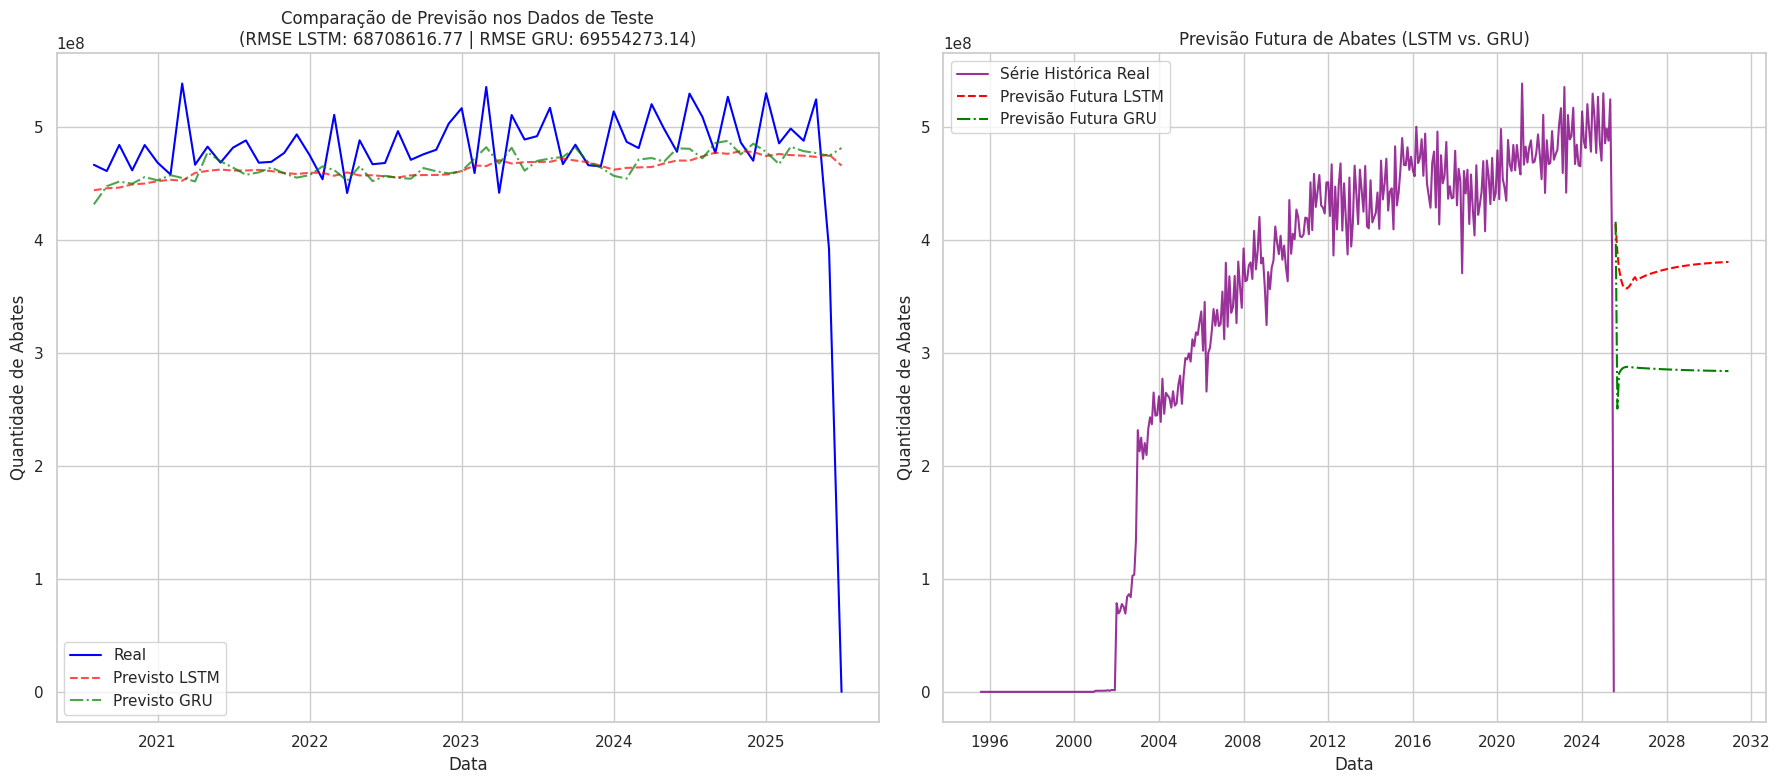


--- Resumo dos Resultados ---
RMSE do Modelo LSTM: 68708616.77
RMSE do Modelo GRU: 69554273.14
O Modelo LSTM teve um RMSE menor, indicando melhor desempenho nos dados de teste.

Para uma análise mais aprofundada, observe as curvas de previsão nos gráficos.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error
import tensorflow as tf

# Carregamento e Pré-processamento
# Leitura do dataset
df = pd.read_csv("animais_abatidos_categoria_uf.csv", sep=";", encoding="latin1")

# Criando a coluna de data
df["DATA"] = pd.to_datetime(df["ANO"].astype(str) + "-" + df["MES"].astype(str) + "-01")

# Agregando a quantidade total por mês
serie = df.groupby("DATA")["QUANTIDADE"].sum().sort_index()

# Escalonamento da série
scaler = MinMaxScaler()
serie_scaled = scaler.fit_transform(serie.values.reshape(-1, 1))

# Função para criar janelas temporais
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 12  # Janel temporal sera de 12 meses
X, y = create_sequences(serie_scaled, window_size)

# Divisão treino/teste
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Funções de Criação, Treinamento e Avaliação de Modelos

def build_and_train_model(model_type, X_train, y_train, X_test, y_test, window_size):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(100, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
    elif model_type == 'GRU':
        model.add(GRU(100, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
    else:
        raise ValueError("model_type deve ser 'LSTM' ou 'GRU'")

    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    print(f"\n--- Treinando Modelo {model_type} ---")
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=8,
        validation_data=(X_test, y_test),
        verbose=0
    )

    y_pred = model.predict(X_test)
    y_pred_inverse = scaler.inverse_transform(y_pred)
    y_test_inverse = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
    print(f"RMSE do Modelo {model_type}: {rmse:.2f}")

    return model, y_pred_inverse, y_test_inverse, rmse

def predict_future(model, initial_sequence, num_months, window_size, scaler):
    last_sequence = initial_sequence.tolist()
    future_predictions_scaled = []

    for _ in range(num_months):
        current_sequence = np.array(last_sequence).reshape(1, window_size, 1)
        next_prediction_scaled = model.predict(current_sequence, verbose=0)[0]
        future_predictions_scaled.append(next_prediction_scaled)
        last_sequence.pop(0)
        last_sequence.append(next_prediction_scaled)

    future_predictions_inverse = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))
    return future_predictions_inverse

# Execução e Comparação dos Modelos

# Treinando e avaliando o modelo LSTM
lstm_model, lstm_y_pred_inverse, lstm_y_test_inverse, lstm_rmse = \
    build_and_train_model('LSTM', X_train, y_train, X_test, y_test, window_size)

# Treinando e avaliando o modelo GRU
gru_model, gru_y_pred_inverse, gru_y_test_inverse, gru_rmse = \
    build_and_train_model('GRU', X_train, y_train, X_test, y_test, window_size)

# Previsões Futuras para Ambos os Modelos

last_original_date = serie.index[-1]
future_dates = pd.date_range(start=last_original_date + pd.DateOffset(months=1), end='2030-12-01', freq='MS')
num_future_months = len(future_dates)
initial_sequence_for_prediction = serie_scaled[-window_size:]

lstm_future_predictions = predict_future(lstm_model, initial_sequence_for_prediction, num_future_months, window_size, scaler)
gru_future_predictions = predict_future(gru_model, initial_sequence_for_prediction, num_future_months, window_size, scaler)

df_lstm_future_predictions = pd.DataFrame({
    'DATA': future_dates,
    'QUANTIDADE_PREVISTA_LSTM': lstm_future_predictions.flatten()
})

df_gru_future_predictions = pd.DataFrame({
    'DATA': future_dates,
    'QUANTIDADE_PREVISTA_GRU': gru_future_predictions.flatten()
})

print("\n--- Previsões Futuras (LSTM) ---")
print(df_lstm_future_predictions.head())
print("...")
print(df_lstm_future_predictions.tail())

print("\n--- Previsões Futuras (GRU) ---")
print(df_gru_future_predictions.head())
print("...")
print(df_gru_future_predictions.tail())

# Visualização da Comparação

plt.figure(figsize=(18, 8))

# Plotagem dos dados de Teste (Real versus Previsto)
plt.subplot(1, 2, 1)
plt.plot(serie.index[-len(y_test):], lstm_y_test_inverse, label="Real", color='blue')
plt.plot(serie.index[-len(y_test):], lstm_y_pred_inverse, label="Previsto LSTM", linestyle="--", color='red', alpha=0.7)
plt.plot(serie.index[-len(y_test):], gru_y_pred_inverse, label="Previsto GRU", linestyle="-.", color='green', alpha=0.7)
plt.title(f"Comparação de Previsão nos Dados de Teste\n(RMSE LSTM: {lstm_rmse:.2f} | RMSE GRU: {gru_rmse:.2f})")
plt.xlabel("Data")
plt.ylabel("Quantidade de Abates")
plt.legend()
plt.grid(True)

# Plotagem das Previsões Futuras
plt.subplot(1, 2, 2)
plt.plot(serie.index, serie.values, label="Série Histórica Real", color='purple', alpha=0.8)
plt.plot(df_lstm_future_predictions['DATA'], df_lstm_future_predictions['QUANTIDADE_PREVISTA_LSTM'], label="Previsão Futura LSTM", linestyle="--", color='red')
plt.plot(df_gru_future_predictions['DATA'], df_gru_future_predictions['QUANTIDADE_PREVISTA_GRU'], label="Previsão Futura GRU", linestyle="-.", color='green')
plt.title("Previsão Futura de Abates (LSTM vs. GRU)")
plt.xlabel("Data")
plt.ylabel("Quantidade de Abates")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- Resumo dos Resultados ---")
print(f"RMSE do Modelo LSTM: {lstm_rmse:.2f}")
print(f"RMSE do Modelo GRU: {gru_rmse:.2f}")

if lstm_rmse < gru_rmse:
    print("O Modelo LSTM teve um RMSE menor, indicando melhor desempenho nos dados de teste.")
elif gru_rmse < lstm_rmse:
    print("O Modelo GRU teve um RMSE menor, indicando melhor desempenho nos dados de teste.")
else:
    print("Ambos os modelos tiveram um desempenho similar nos dados de teste.")

print("\nPara uma análise mais aprofundada, observe as curvas de previsão nos gráficos.")